## Import Dependencies

In [2]:
import sys
from pathlib import Path
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Add the project root to sys.path
sys.path.append(str(Path().resolve().parent))

In [4]:
#Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Ingest Data Using ZipDataIngestor

In [5]:
# Import Data Ingestor
from src.ingestion.zip_data_ingestor import ZipDataIngestor

In [6]:
# Load ZIP and extract
ingestor =ZipDataIngestor("C:\\Users\\oluwa\\OneDrive\\Desktop\\From Click to Cart Behavioral Insights from E-commerce Users\\data\\archive.zip")
ingestor.extract()

Extracted to: extracted_data


In [7]:
#Load the CSV
df = ingestor.load_csv("Shopping Trends And Customer Behaviour Dataset.csv")
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Check Structure and Summary

In [8]:
#shape
df.shape

(3900, 18)

In [ ]:
# Data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [10]:
# Descriptive statistics
df.describe(include='all')

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,NaN,2,25,4,NaN,50,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,NaN,2652,171,1737,NaN,96,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1949.500000,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,0.000000,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,974.750000,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1949.500000,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2924.250000,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


-- the data has a count of 3900 across all columns
-- Average customer age is around 44, minimum age is 18 and maximum age is 70
-- unique gender type is 2; male and female. There is a gender imbalance with Male accounting for 68% of the customers. Do males spend more? Do they use more discounts?
-- male-dominated dataset but the most purchased item is 'Blouse' totalling 171 purchases. 
-- There 4 distinct product categories, and clothng dominates with about 45% of the total purchase coming from this category. what is the discount usage in this category? 
-- Average purchase amount is $59.76, could we segment into high-spenders vs low-spenders. 
-- 50 unique locations. Montana has the highest number of purchases (96). Are they spending more or do they buy more often?
-- 25 unique colors but Olive is the most popular. Top color in different categories? 
-- There are 4 seasons but most purchases happens in spring. Do products offer more discounts during spring? 
-- The review rating is positively skewed, with 75% being 4.4. 
-- 73% of users are unsubscribed. what is the average purchase amount of subscribed users vs unsubscribed users? Review rating differences between both groups.
-- Free shipping is the most common of the 6 types of shipping. How does shipping type influence purchase amount, return rate, rating?
-- Most people paid in full. 57% did not use promos/discounts. Deeper look into the behaviour of discount users. Does promo use correlate with lower/higher spend?
-- Paypal dominates the payment methods amongst the 6 methods
-- 7 levels of frequency of purchases but people purchasing every 3 months is the highest frequency showing that a large chunk of users are moderately engaged


## Check for Missing or Duplicate Data

In [12]:
# missing values
df.isnull().sum()

Unnamed: 0                0
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [13]:
# check duplicates
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

In [ ]:
# Gender distribution by percentage
df['Gender'].value_counts(normalize=True)*100

Gender
Male      68.0
Female    32.0
Name: proportion, dtype: float64

In [16]:
# Average spend by Gender
avg_spend_by_gender = df.groupby("Gender")["Purchase Amount (USD)"].mean()
avg_spend_by_gender

Gender
Female    60.249199
Male      59.536199
Name: Purchase Amount (USD), dtype: float64

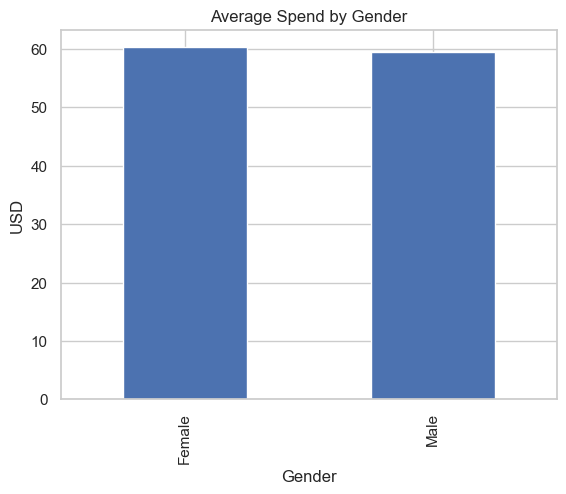

In [ ]:
# Average spend per Gender
avg_spend_by_gender.plot(kind="bar", title="Average Spend by Gender")
plt.ylabel("USD")
plt.show()

In [ ]:
#Total spend by Gender
df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)

,Gender,Purchase Amount (USD)
1,Male,157890
0,Female,75191


In [18]:
pd.crosstab(df['Gender'], df['Discount Applied'], normalize='index')*100

Discount Applied,No,Yes
Gender,,
Female,100.000000,0.000000
Male,36.764706,63.235294


--- Though the data is skewed in the male's direction, the female customers tend to spend more averagely than the male customers, meanwhile male customers generate more revenue than female customers. The female customers also do not apply discount when buying but about 63% of the male customers applied discount. 

In [23]:
# Average spend by age group
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-70']

df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

avg_spend_by_age = df.groupby('Age Group')['Purchase Amount (USD)'].mean().reset_index()
avg_spend_by_age

C:\Users\oluwa\AppData\Local\Temp\ipykernel_24400\3764530688.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_by_age = df.groupby('Age Group')['Purchase Amount (USD)'].mean().reset_index()


,Age Group,Purchase Amount (USD)
0,18-24,60.201646
1,25-34,60.132450
2,35-44,59.620027
3,45-54,60.332447
4,55-64,58.716378
5,65-70,59.704918


C:\Users\oluwa\AppData\Local\Temp\ipykernel_24400\1314879122.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spend_by_age, x='Age Group', y='Purchase Amount (USD)', palette='viridis')


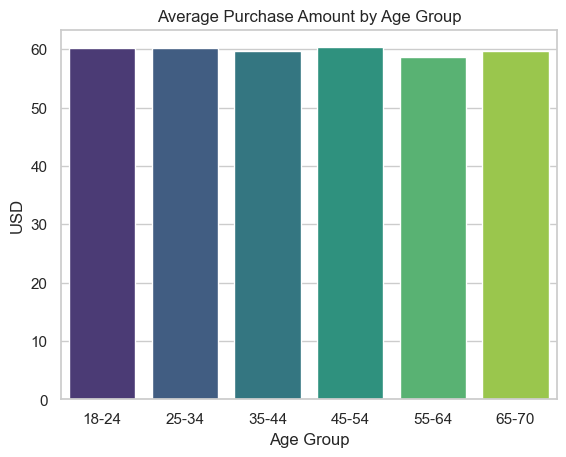

In [25]:
sns.barplot(data=avg_spend_by_age, x='Age Group', y='Purchase Amount (USD)', palette='viridis')
plt.title("Average Purchase Amount by Age Group")
plt.ylabel("USD")
plt.xlabel("Age Group")
plt.show()

In [48]:
#total spend by age group
total_spend_by_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].sum().reset_index().sort_values(by= 'Purchase Amount (USD)', ascending=False)
total_spend_by_age_group 

C:\Users\oluwa\AppData\Local\Temp\ipykernel_24400\131251120.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_spend_by_age_group = df.groupby('Age Group')['Purchase Amount (USD)'].sum().reset_index().sort_values(by= 'Purchase Amount (USD)', ascending=False)


,Age Group,Purchase Amount (USD)
1,25-34,45400
3,45-54,45370
4,55-64,44096
2,35-44,43463
0,18-24,29258
5,65-70,25494


In [26]:
# Most purchased Item
df['Item Purchased'].value_counts().head(10)

Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Name: count, dtype: int64

In [32]:
# top 10 items based on revenue
top_items_by_revenue = df.groupby('Item Purchased')['Purchase Amount (USD)'] \
                         .sum().reset_index() \
                         .sort_values(by='Purchase Amount (USD)', ascending=False) \
                         .head(10)

top_items_by_revenue


,Item Purchased,Purchase Amount (USD)
2,Blouse,10410
16,Shirt,10332
5,Dress,10320
13,Pants,10090
12,Jewelry,10010
22,Sunglasses,9649
1,Belt,9635
15,Scarf,9561
23,Sweater,9462
18,Shorts,9433


In [ ]:
# Clothing category dominance
df['Category'].value_counts(normalize=True)*100

Category
Clothing       44.538462
Accessories    31.794872
Footwear       15.358974
Outerwear       8.307692
Name: proportion, dtype: float64

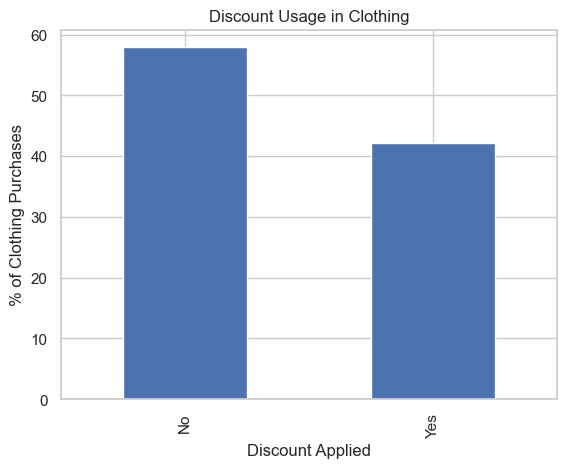

In [34]:
clothing_discount = df[df['Category'] == 'Clothing']['Discount Applied'].value_counts(normalize=True) * 100
clothing_discount.plot(kind='bar', title='Discount Usage in Clothing')
plt.ylabel('% of Clothing Purchases')
plt.show()

In [36]:
# segmenting spenders
spend_bins = [0, 40, 70, 100]
spend_labels = ['Low Spender ($20-$40)', 'Mid Spender ($50-$70)', 'High Spender ($80-$100)']

df['Spender Category'] = pd.cut(df['Purchase Amount (USD)'], bins=spend_bins, labels=spend_labels)
df['Spender Category'].value_counts().sort_index()

Spender Category
Low Spender ($20-$40)      1060
Mid Spender ($50-$70)      1393
High Spender ($80-$100)    1447
Name: count, dtype: int64

In [38]:
#Top 10 location by purchase count
top_10_location_by_purchase_count = df['Location'].value_counts().head(10)
top_10_location_by_purchase_count


Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Minnesota     88
New York      87
Nevada        87
Nebraska      87
Delaware      86
Name: count, dtype: int64

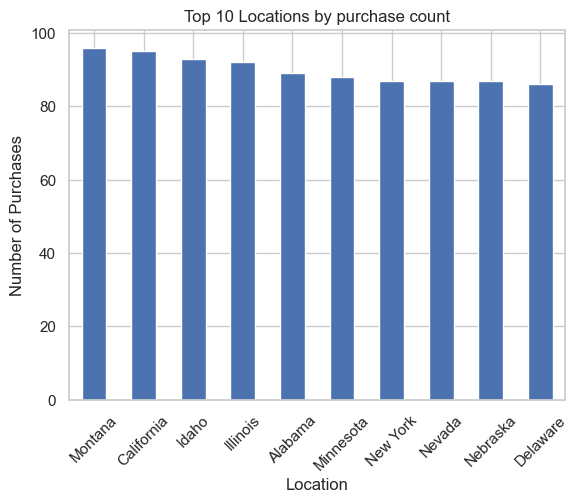

In [40]:
top_10_location_by_purchase_count.plot(kind='bar', title='Top 10 Locations by purchase count')
plt.xticks(rotation=45)
plt.ylabel("Number of Purchases")
plt.show()

In [43]:
#top 10 location by revenue
top_10_location_by_revenue = df.groupby('Location')['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False).head(10)
top_10_location_by_revenue


,Location,Purchase Amount (USD)
25,Montana,5784
12,Illinois,5617
4,California,5605
11,Idaho,5587
27,Nevada,5514
0,Alabama,5261
31,New York,5257
33,North Dakota,5220
47,West Virginia,5174
26,Nebraska,5172


In [44]:
#Average spend by location
df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending=False).head(10)

Location
Alaska           67.597222
Pennsylvania     66.567568
Arizona          66.553846
West Virginia    63.876543
Nevada           63.379310
Washington       63.328767
North Dakota     62.891566
Virginia         62.883117
Utah             62.577465
Michigan         62.095890
Name: Purchase Amount (USD), dtype: float64

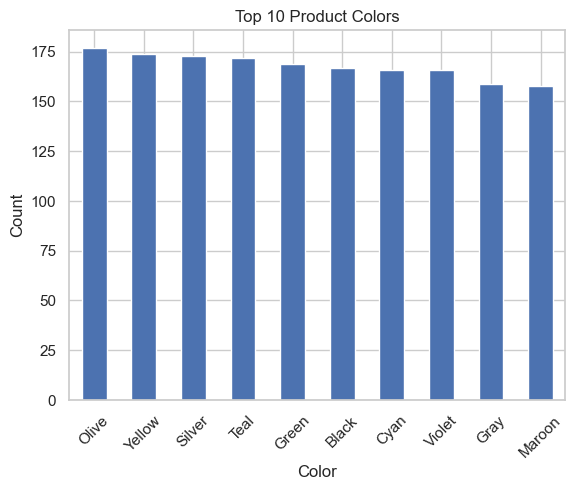

In [49]:
# Top 10 colors purchased
df['Color'].value_counts().head(10).plot(kind='bar', title="Top 10 Product Colors")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

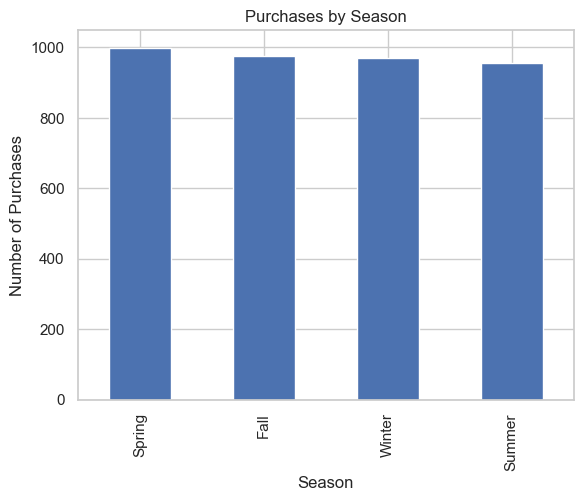

In [50]:
#Number of purchases by season
df['Season'].value_counts().plot(kind='bar', title="Purchases by Season")
plt.ylabel("Number of Purchases")
plt.show()

In [51]:
# Total Revenue per season
df.groupby('Season')['Purchase Amount (USD)'].sum().reset_index().sort_values(by='Purchase Amount (USD)', ascending=False)

,Season,Purchase Amount (USD)
0,Fall,60018
1,Spring,58679
3,Winter,58607
2,Summer,55777


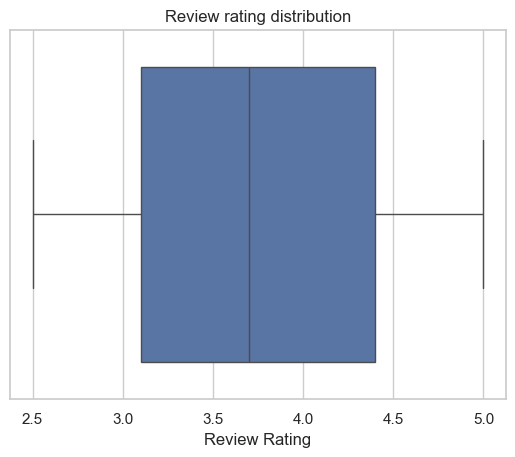

In [52]:
# Review ratings
sns.boxplot(data=df, x="Review Rating")
plt.title("Review rating distribution")
plt.show()

In [74]:
df['Low Rating'] = df['Review Rating'] < 3

pd.crosstab(df['Low Rating'], df['Frequency of Purchases'], normalize='index')*100

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Low Rating,,,,,,,
False,14.836703,13.841369,15.023328,14.245723,14.152411,14.090202,13.810264
True,13.868613,14.890511,14.744526,12.262774,14.306569,16.058394,13.868613


In [53]:
#subscriber vs non-subscriber behavior
df['Subscription Status'].value_counts(normalize=True)*100

Subscription Status
No     73.0
Yes    27.0
Name: proportion, dtype: float64

In [54]:
# Revenue from subscriber vs non-subscriber
df.groupby("Subscription Status")["Purchase Amount (USD)"].sum()

Subscription Status
No     170436
Yes     62645
Name: Purchase Amount (USD), dtype: int64

In [55]:
# Average spend by subscriber vs non-subscriber
df.groupby("Subscription Status")["Purchase Amount (USD)"].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [59]:
# Shipping type
df["Shipping Type"].value_counts()

Shipping Type
Free Shipping     675
Standard          654
Store Pickup      650
Next Day Air      648
Express           646
2-Day Shipping    627
Name: count, dtype: int64

In [66]:
#Revenue by shippin method
revenue_by_shipping_method = df.groupby("Shipping Type")["Purchase Amount (USD)"].sum().reset_index().sort_values(by="Purchase Amount (USD)", ascending=False)
revenue_by_shipping_method

,Shipping Type,Purchase Amount (USD)
2,Free Shipping,40777
1,Express,39067
5,Store Pickup,38931
4,Standard,38233
0,2-Day Shipping,38080
3,Next Day Air,37993


In [65]:
# Average spend by shipping method
df.groupby("Shipping Type")["Purchase Amount (USD)"].mean().sort_values()

Shipping Type
Standard          58.460245
Next Day Air      58.631173
Store Pickup      59.893846
Free Shipping     60.410370
Express           60.475232
2-Day Shipping    60.733652
Name: Purchase Amount (USD), dtype: float64

In [68]:
df["Promo Code Used"].value_counts(normalize=True)*100

Promo Code Used
No     57.0
Yes    43.0
Name: proportion, dtype: float64

---- 57% of customers uses the promo code when shopping

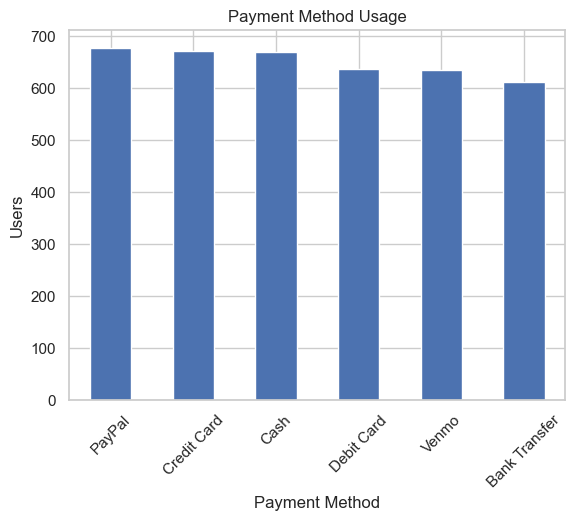

In [69]:
#Payment Method Preferences
df["Payment Method"].value_counts().plot(kind="bar", title="Payment Method Usage")
plt.xticks(rotation=45)
plt.ylabel("Users")
plt.show()

---- The most popular method of payment is PayPal followed by Credit Card. 

In [ ]:
df['Frequency of Purchases'].value_counts()

Frequency of Purchases
Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: count, dtype: int64